#  Restricted Boltzmann Machines (RBMs) and Deep Belief Networks (DBNs) from scratch for representation learning on the MNIST dataset.

All of the code has been written based on "A Practical Guide to Training Restricted Boltzmann Machines" by Geoffrey Hinton and "A fast learning algorithm for deep belief nets" by Geoffrey Hinton et al. Both of the papers can be found at literature/.

The documentation of the code generated by Sphinx is located docs/.

Some of the code is credited to the TAs and lecturers of DD2437 Artificial Neural Networks and Deep Architectures, who delivered an amazing set of lectures and laboratories. Thanks for all, it was really educational! The code was part of a laboratory, the description of which (with much of the theoretical background) is located at ./.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet

## RBMs for representation learning on the MNIST hand-written digits dataset

Train an RBM on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration, and observe the reconstruction loss over epochs.

The learned weigths are visualized and saved at rbm_viz/.

(100, 784)
(100, 10)

Starting a Restricted Boltzmann Machine..
learning CD1
iteration=      1 Reconstruction loss=43.6062
iteration=      2 Reconstruction loss=40.8332
iteration=      3 Reconstruction loss=38.2474
iteration=      4 Reconstruction loss=36.0492
iteration=      5 Reconstruction loss=34.4685
iteration=      6 Reconstruction loss=33.5406
iteration=      7 Reconstruction loss=32.7484
iteration=      8 Reconstruction loss=31.6800
iteration=      9 Reconstruction loss=31.1852
iteration=     10 Reconstruction loss=30.5098
iteration=     11 Reconstruction loss=30.1031
iteration=     12 Reconstruction loss=29.7281
iteration=     13 Reconstruction loss=28.9016
iteration=     14 Reconstruction loss=28.5722
iteration=     15 Reconstruction loss=27.7141
iteration=     16 Reconstruction loss=27.4879
iteration=     17 Reconstruction loss=27.3637
iteration=     18 Reconstruction loss=26.9371
iteration=     19 Reconstruction loss=26.6881
iteration=     20 Reconstruction loss=26.1718
ite

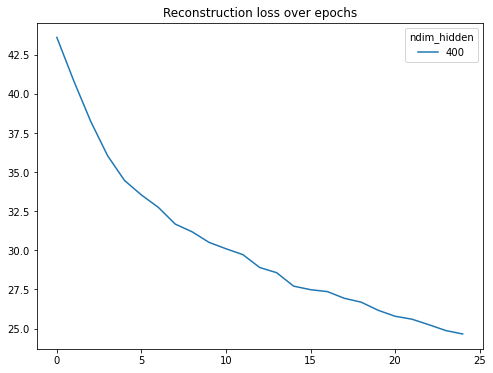

In [6]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

indices = np.random.choice(train_imgs.shape[0], 100, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)

epochs = 25
hidden = 400
print(f"\nStarting a Restricted Boltzmann Machine with ndim_hidden: {hidden}")


rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                 ndim_hidden=hidden,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=15)

loss_history = rbm.cd1(visible_trainset=train_imgs, n_iterations=epochs)
    
plt.figure(figsize=(8,6))
plt.plot(range(epochs), loss_history, label=hidden)

plt.title("Reconstruction loss over epochs")
plt.legend(title="ndim_hidden")
plt.savefig(f'single_rbm/loss_ndim_hidden_{hidden}.png')
plt.show()

Train several RBMs with different number of hidden layers on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration, and observe the reconstruction loss over epochs for each hidden layer dimension.

The learned weigths are visualized and saved at rbm_viz/.

(100, 784)
(100, 10)

Starting a Restricted Boltzmann Machine..
200
learning CD1
iteration=      1 Reconstruction loss=47.8370
iteration=      2 Reconstruction loss=44.0170
iteration=      3 Reconstruction loss=40.7998
iteration=      4 Reconstruction loss=37.8698
iteration=      5 Reconstruction loss=36.3656
iteration=      6 Reconstruction loss=34.8296
iteration=      7 Reconstruction loss=34.3396
iteration=      8 Reconstruction loss=33.6482
iteration=      9 Reconstruction loss=32.8858
iteration=     10 Reconstruction loss=32.0376
iteration=     11 Reconstruction loss=31.5255
iteration=     12 Reconstruction loss=30.8965
iteration=     13 Reconstruction loss=30.5175
iteration=     14 Reconstruction loss=30.0319
iteration=     15 Reconstruction loss=29.4020
iteration=     16 Reconstruction loss=29.1016
iteration=     17 Reconstruction loss=28.3578
iteration=     18 Reconstruction loss=28.3506
iteration=     19 Reconstruction loss=27.8663
iteration=     20 Reconstruction loss=27.6865

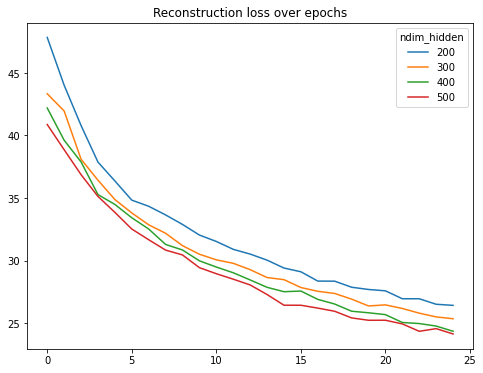

In [8]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

indices = np.random.choice(train_imgs.shape[0], 100, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)



hidden_dims = [200, 300, 400, 500]
epochs = 25
loss_history = np.zeros((len(hidden_dims), epochs))
i = 0

for hidden in hidden_dims:
    print(f"\nStarting a Restricted Boltzmann Machine with ndim_hidden: {hidden}")
    rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                 ndim_hidden=hidden,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=15)

    loss_history[i] = rbm.cd1(visible_trainset=train_imgs, n_iterations=epochs)
    i += 1

plt.figure(figsize=(8,6))

for plots in range(len(hidden_dims)):
    plt.plot(range(epochs), loss_history[plots], label=hidden_dims[plots])

plt.title("Reconstruction loss over epochs")
plt.legend(title="ndim_hidden")
plt.savefig(f'single_rbm/loss_ndim_hidden_compare.png')
plt.show()

## DBNs for representation learning on the MNIST hand-written digits dataset

### DBN training

Train the DBN (from the Hinton paper) on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration and greedy layer-wise training, and observe the reconstruction losses per layer per epoch over the process.

Also, save the trained weigths of the layers at trained_rbm/, so they can be loaded (for recognition and generation).

(10, 784)
(10, 10)

Starting a Deep Belief Net..
loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm
accuracy = 100.00%
accuracy = 28.69%


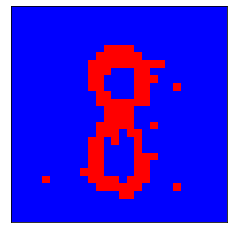

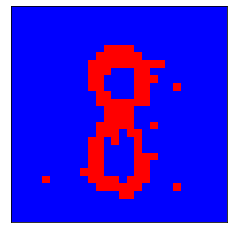

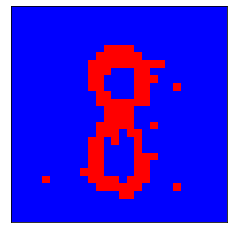

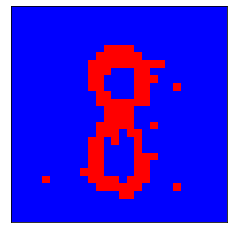

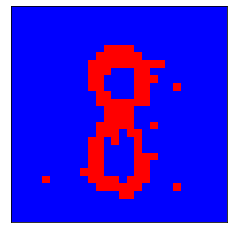

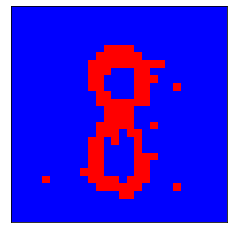

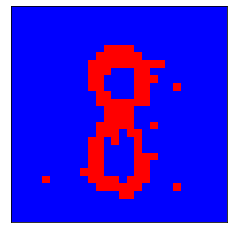

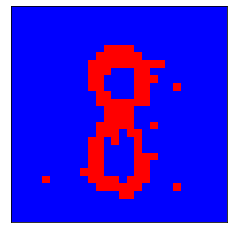

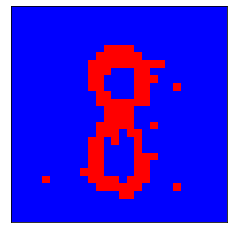

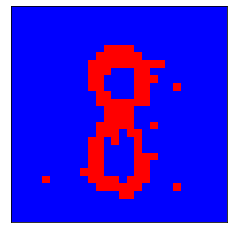

In [14]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

np.random.seed(100)
indices = np.random.choice(train_imgs.shape[0], 10, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)


print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=10)

''' greedy layer-wise training '''

dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=100)

### DBN as discriminative model

DBN as a recognition model. Check accuracy of recognition on the training and the test datasets.

In [15]:
print("Accuracy on training dataset is:")
dbn.recognize(train_imgs, train_lbls)

print("\nAccuracy on test dataset is:")
dbn.recognize(test_imgs, test_lbls)

Accuracy on training dataset is:
accuracy = 100.00%

Accuracy on test dataset is:
accuracy = 28.47%


### DBN as generative model

DBN as a generative model. Generate images from the learned posterior by labels.

Generation is done via alternating Gibbs sampling for k iterations (check dbn.py). There will be this many images generated. The generated images are stiched together and animated, and saved at dbn_mp4/.

Generating images by label with DBN...

Generated for label 0
Generated for label 1
Generated for label 2
Generated for label 3
Generated for label 4
Generated for label 5
Generated for label 6
Generated for label 7
Generated for label 8
Generated for label 9


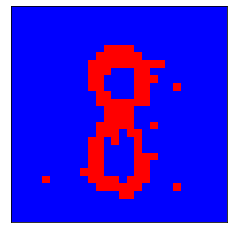

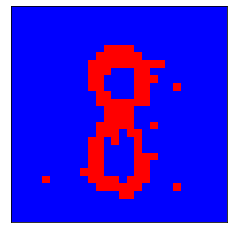

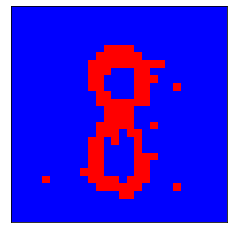

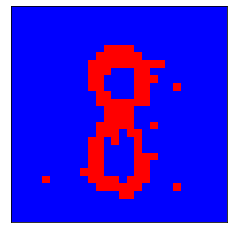

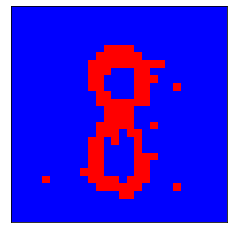

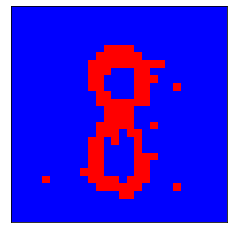

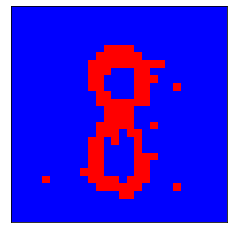

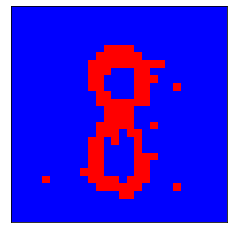

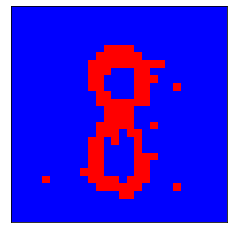

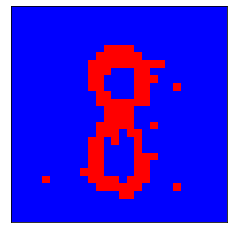

In [16]:
print("Generating images by label with DBN...\n")

for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    print(f"Generated for label {digit}")
    dbn.generate(digit_1hot, name="rbms")

## TODO
1. Supervised fine-tuning of recognition weights of DBN with the wake-sleep algorithm
2. Momentum parameter update in RBM for more robust gradient-based optimization